In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.svm import SVC

In [2]:
df=pd.read_csv(r"rainfall.csv")
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [3]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4086,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4087,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4088,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5


In [4]:
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
df.tail()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
4085,LAKSHADWEEP,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6
4086,LAKSHADWEEP,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1
4087,LAKSHADWEEP,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4088,LAKSHADWEEP,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4089,LAKSHADWEEP,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4


In [6]:
len(df)

4090

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4090 entries, 0 to 4089
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4090 non-null   object 
 1   YEAR         4090 non-null   int64  
 2   JAN          4090 non-null   float64
 3   FEB          4090 non-null   float64
 4   MAR          4090 non-null   float64
 5   APR          4090 non-null   float64
 6   MAY          4090 non-null   float64
 7   JUN          4090 non-null   float64
 8   JUL          4090 non-null   float64
 9   AUG          4090 non-null   float64
 10  SEP          4090 non-null   float64
 11  OCT          4090 non-null   float64
 12  NOV          4090 non-null   float64
 13  DEC          4090 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4090 non-null   float64
 16  Mar-May      4090 non-null   float64
 17  Jun-Sep      4090 non-null   float64
 18  Oct-Dec      4090 non-null   float64
dtypes: flo

In [8]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
mean,1958.321271,18.818484,21.644792,27.252494,42.714548,84.868044,228.928020,346.496968,289.897506,197.003056,95.139022,39.548191,18.695575,1411.008900,40.462861,154.835452,1062.325575,153.384499
std,33.148944,33.521719,35.762010,46.829179,67.264863,122.556801,233.535693,269.352685,187.702293,135.266708,99.325638,68.275513,42.185553,903.846565,59.136229,200.315769,705.970202,166.414108
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.500000,70.000000,175.225000,155.925000,100.400000,14.600000,0.700000,0.100000,804.500000,4.100000,23.800000,573.275000,34.025000
50%,1959.000000,5.900000,6.600000,7.800000,15.500000,36.050000,138.450000,284.300000,259.500000,173.600000,64.650000,9.500000,3.000000,1121.300000,19.000000,74.250000,880.200000,97.550000
75%,1987.000000,21.950000,26.600000,31.100000,49.375000,94.975000,302.250000,416.700000,377.775000,265.600000,148.100000,45.475000,17.300000,1644.775000,50.200000,195.300000,1286.175000,211.800000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [9]:
df.shape

(4090, 19)

In [10]:
df.isnull()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4085,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4086,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4087,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4088,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
df.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

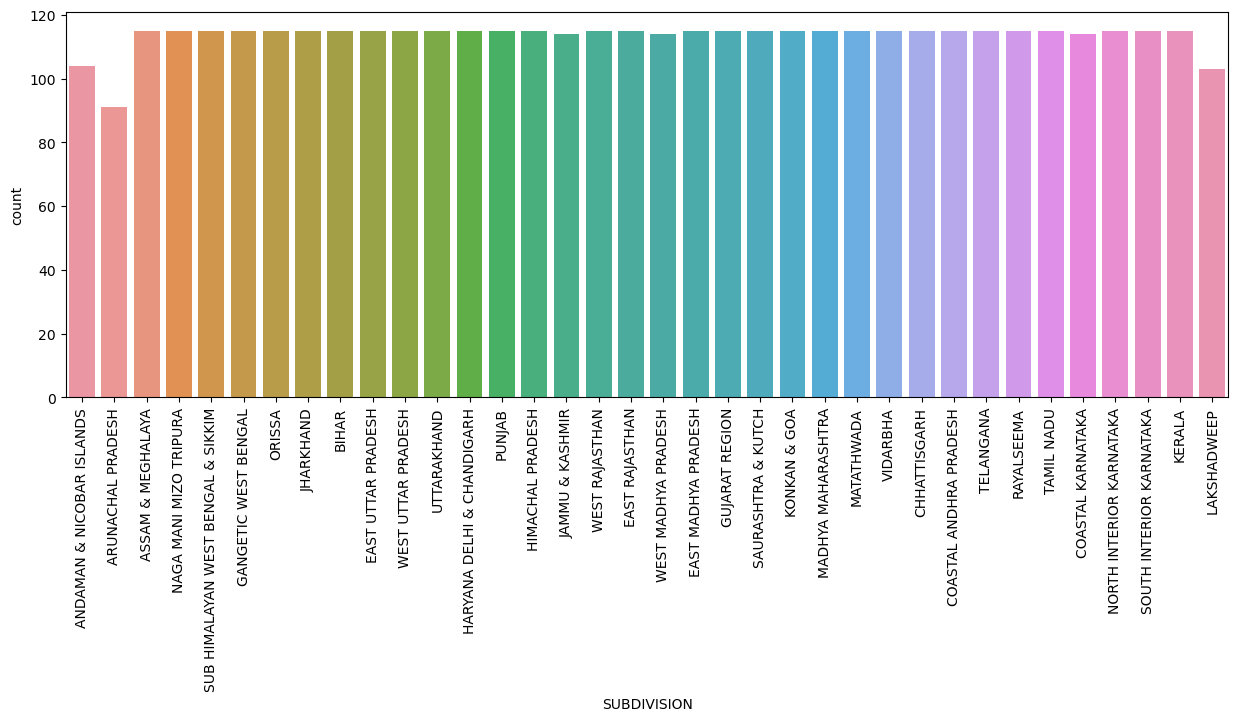

In [12]:
plt.figure(figsize=(15,5))
sns.countplot(x='SUBDIVISION', data=df)
plt.xticks(rotation=90)
plt.show()

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'JAN'}>,
        <AxesSubplot:title={'center':'FEB'}>,
        <AxesSubplot:title={'center':'MAR'}>],
       [<AxesSubplot:title={'center':'APR'}>,
        <AxesSubplot:title={'center':'MAY'}>,
        <AxesSubplot:title={'center':'JUN'}>,
        <AxesSubplot:title={'center':'JUL'}>],
       [<AxesSubplot:title={'center':'AUG'}>,
        <AxesSubplot:title={'center':'SEP'}>,
        <AxesSubplot:title={'center':'OCT'}>,
        <AxesSubplot:title={'center':'NOV'}>],
       [<AxesSubplot:title={'center':'DEC'}>,
        <AxesSubplot:title={'center':'ANNUAL'}>,
        <AxesSubplot:title={'center':'Jan-Feb'}>,
        <AxesSubplot:title={'center':'Mar-May'}>],
       [<AxesSubplot:title={'center':'Jun-Sep'}>,
        <AxesSubplot:title={'center':'Oct-Dec'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

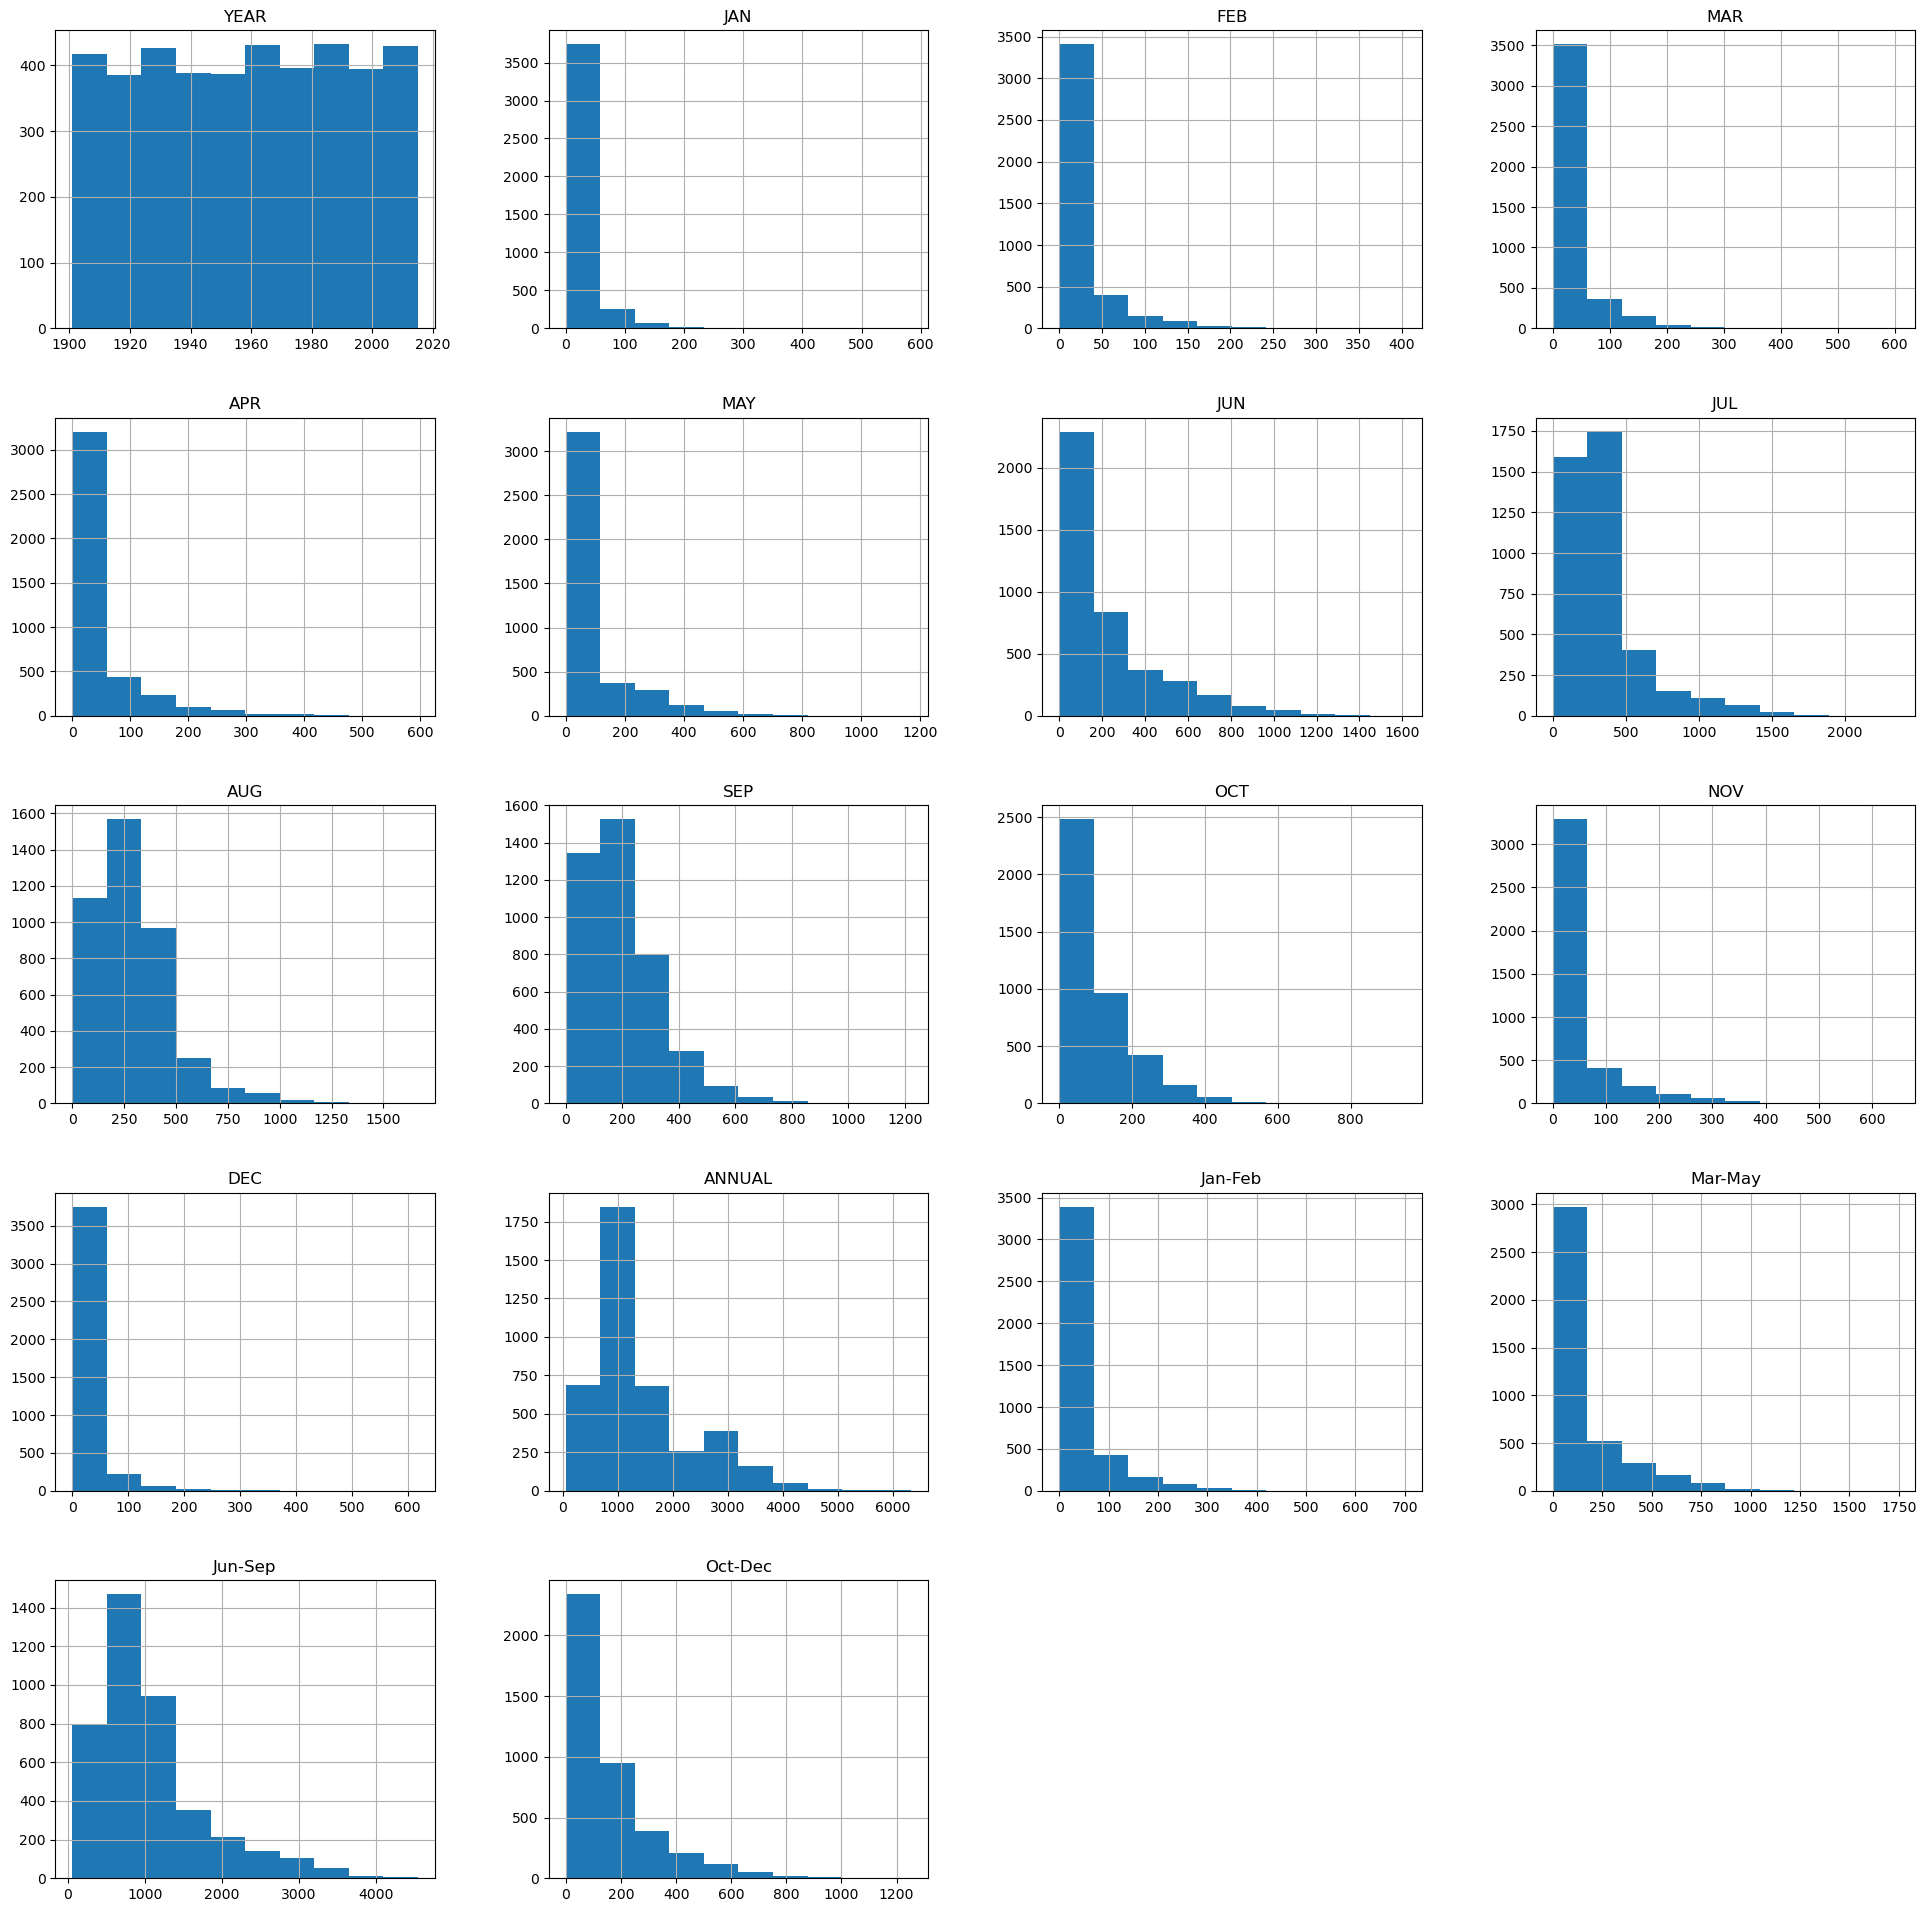

In [13]:
df.hist(figsize=(24,24))

In [14]:
subdivs = df['SUBDIVISION'].unique()
subdivs

array(['ANDAMAN & NICOBAR ISLANDS', 'ARUNACHAL PRADESH',
       'ASSAM & MEGHALAYA', 'NAGA MANI MIZO TRIPURA',
       'SUB HIMALAYAN WEST BENGAL & SIKKIM', 'GANGETIC WEST BENGAL',
       'ORISSA', 'JHARKHAND', 'BIHAR', 'EAST UTTAR PRADESH',
       'WEST UTTAR PRADESH', 'UTTARAKHAND', 'HARYANA DELHI & CHANDIGARH',
       'PUNJAB', 'HIMACHAL PRADESH', 'JAMMU & KASHMIR', 'WEST RAJASTHAN',
       'EAST RAJASTHAN', 'WEST MADHYA PRADESH', 'EAST MADHYA PRADESH',
       'GUJARAT REGION', 'SAURASHTRA & KUTCH', 'KONKAN & GOA',
       'MADHYA MAHARASHTRA', 'MATATHWADA', 'VIDARBHA', 'CHHATTISGARH',
       'COASTAL ANDHRA PRADESH', 'TELANGANA', 'RAYALSEEMA', 'TAMIL NADU',
       'COASTAL KARNATAKA', 'NORTH INTERIOR KARNATAKA',
       'SOUTH INTERIOR KARNATAKA', 'KERALA', 'LAKSHADWEEP'], dtype=object)

In [15]:
num_of_subdivs = subdivs.size
print('Total # of Subdivs: ' + str(num_of_subdivs))

Total # of Subdivs: 36


In [16]:
avg=df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL']
avg

SUBDIVISION
ARUNACHAL PRADESH                     3418.857143
COASTAL KARNATAKA                     3408.409649
KONKAN & GOA                          2977.686087
ANDAMAN & NICOBAR ISLANDS             2927.439423
KERALA                                2925.487826
SUB HIMALAYAN WEST BENGAL & SIKKIM    2752.217391
ASSAM & MEGHALAYA                     2580.695652
NAGA MANI MIZO TRIPURA                2433.619130
LAKSHADWEEP                           1590.886408
GANGETIC WEST BENGAL                  1490.487826
UTTARAKHAND                           1465.696522
ORISSA                                1458.169565
CHHATTISGARH                          1371.728696
JHARKHAND                             1309.303478
HIMACHAL PRADESH                      1260.345217
EAST MADHYA PRADESH                   1205.000000
BIHAR                                 1197.633913
JAMMU & KASHMIR                       1139.684211
VIDARBHA                              1095.459130
COASTAL ANDHRA PRADESH                

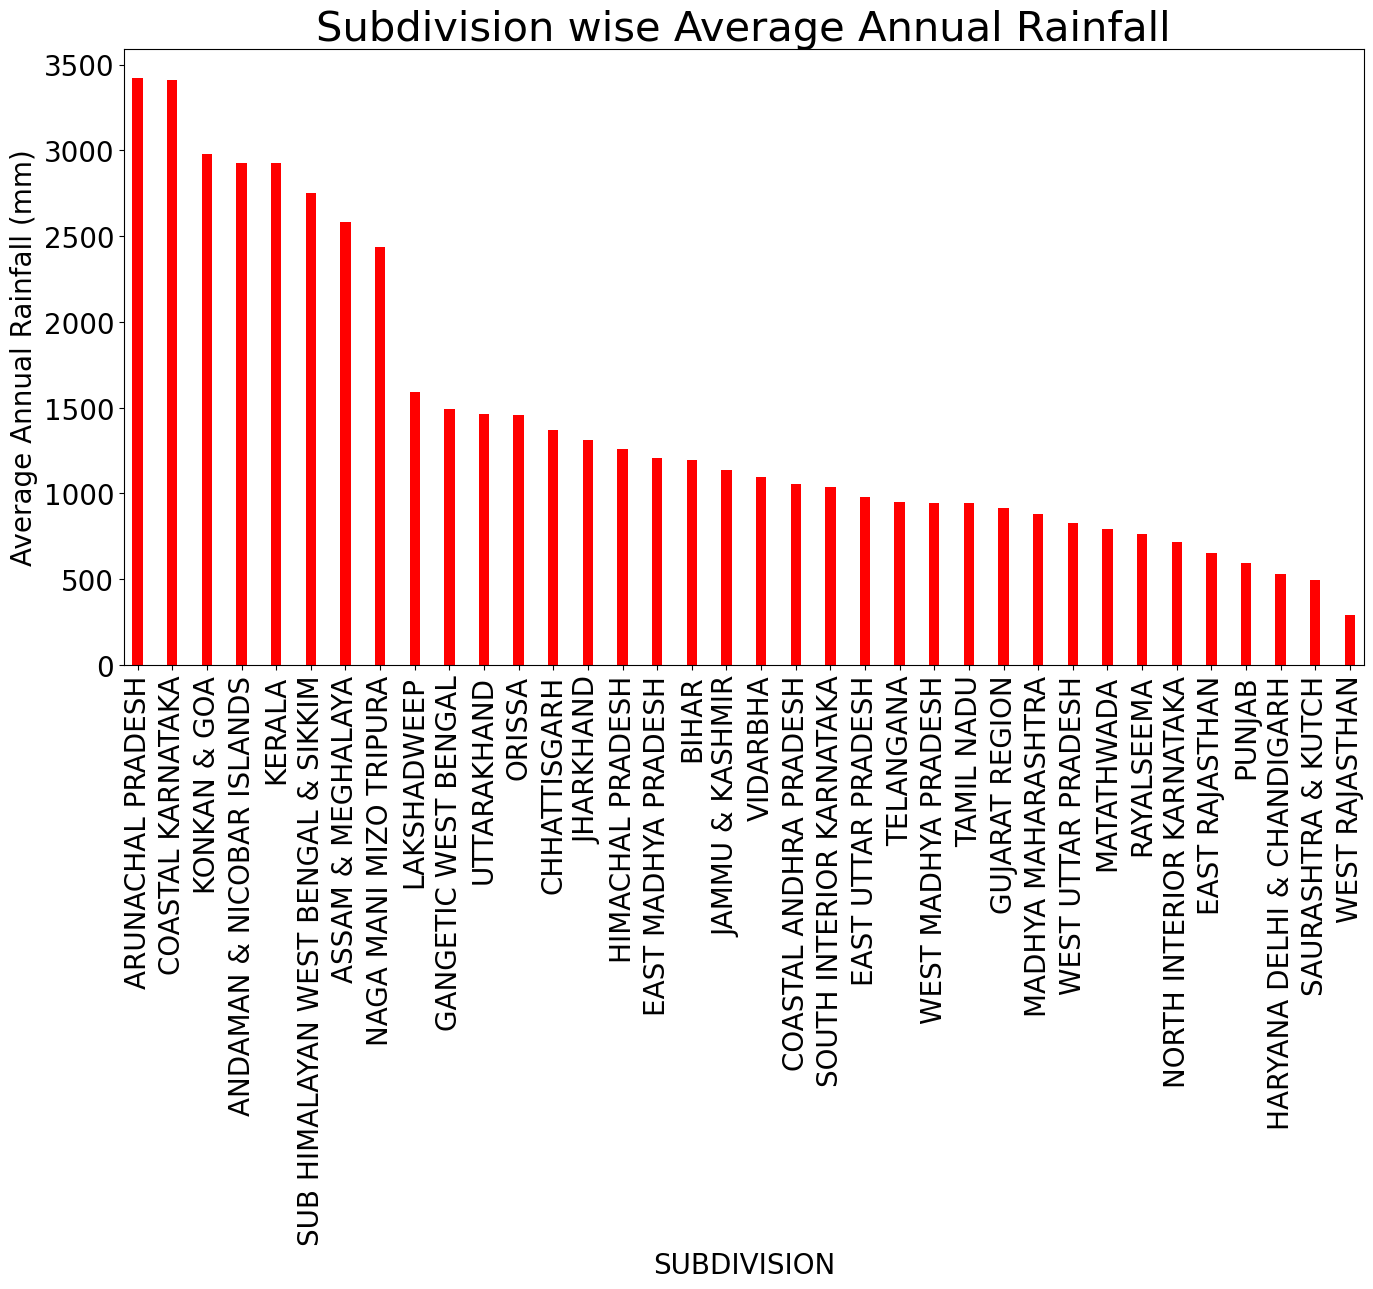

In [17]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL', ascending=False)['ANNUAL'].plot(kind='bar', color='r',width=0.3,title='Subdivision wise Average Annual Rainfall', fontsize=20)
plt.xticks(rotation = 90)
plt.ylabel('Average Annual Rainfall (mm)')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

In [18]:
dff = df.groupby('YEAR').sum()['ANNUAL']
dff

YEAR
1901    44947.5
1902    46805.6
1903    47596.9
1904    43287.0
1905    41516.2
         ...   
2011    50146.4
2012    43524.5
2013    53106.2
2014    44796.1
2015    46101.0
Name: ANNUAL, Length: 115, dtype: float64

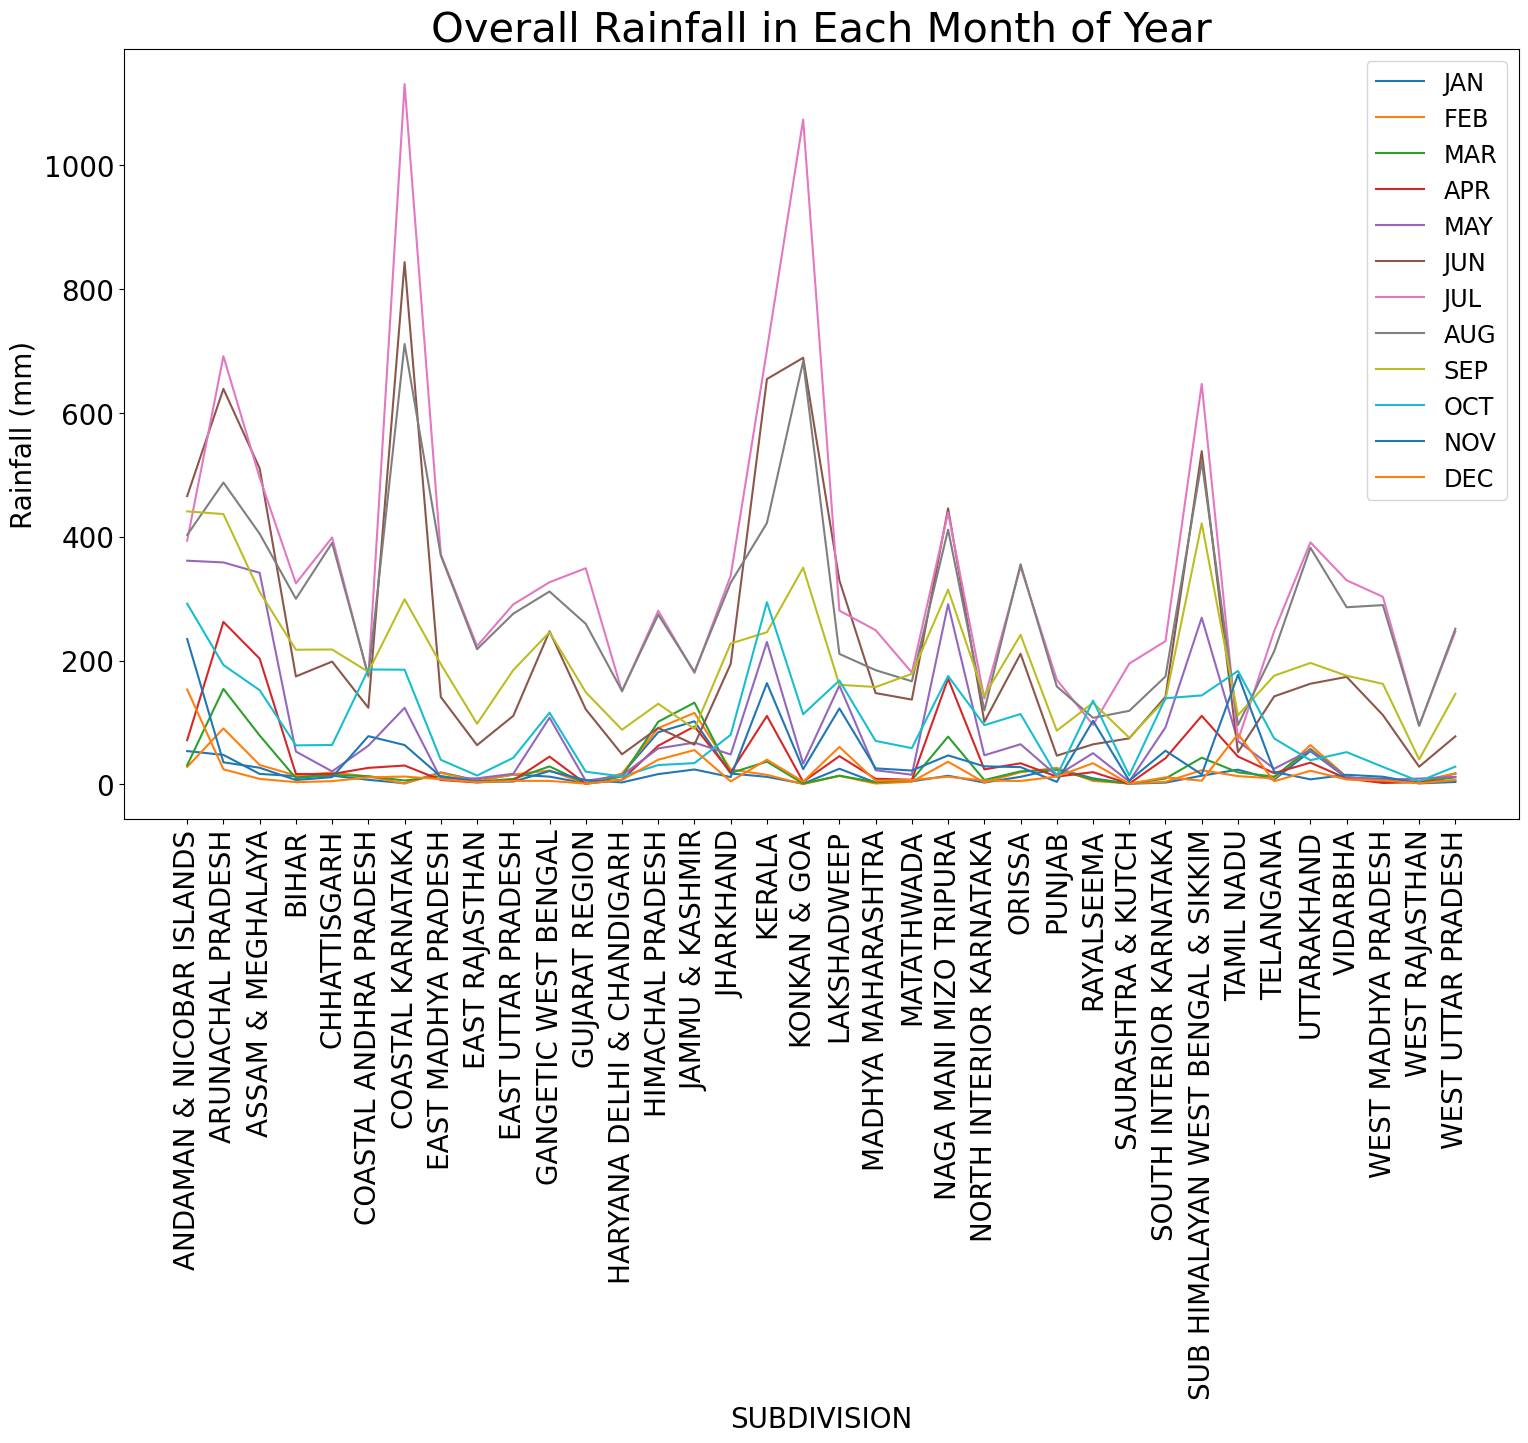

In [19]:
months = df.columns[2:14]
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)
xlbls = df['SUBDIVISION'].unique()
xlbls.sort()
dff = df.groupby('SUBDIVISION').mean()[months]
dff.plot.line(title='Overall Rainfall in Each Month of Year', ax=ax,fontsize=20)
plt.xticks(np.linspace(0,35,36,endpoint=True),xlbls)
plt.xticks(  rotation = 90)
plt.ylabel('Rainfall (mm)')
plt.legend(loc='upper right', fontsize = 'xx-large')
ax.title.set_fontsize(30)
ax.xaxis.label.set_fontsize(20)
ax.yaxis.label.set_fontsize(20)

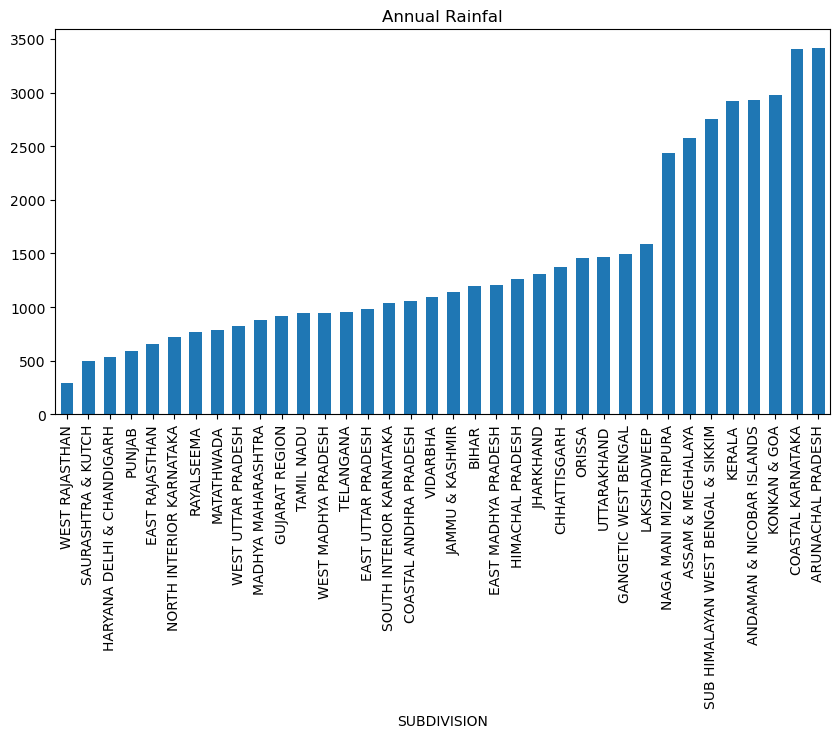

In [20]:
plt.figure(figsize=(10,5))
df_annual=df.groupby('SUBDIVISION').mean().sort_values(by='ANNUAL')['ANNUAL'].plot(kind='bar', width=0.6, title='Annual Rainfal')

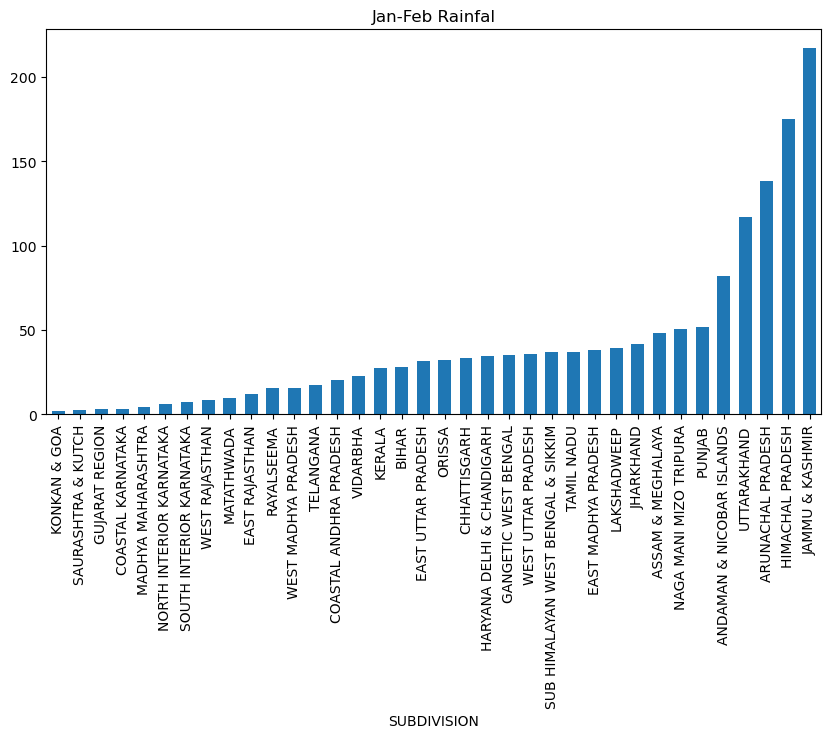

In [21]:
plt.figure(figsize=(10,5))
df_annual=df.groupby('SUBDIVISION').mean().sort_values(by='Jan-Feb')['Jan-Feb'].plot(kind='bar', width=0.6, title='Jan-Feb Rainfal')

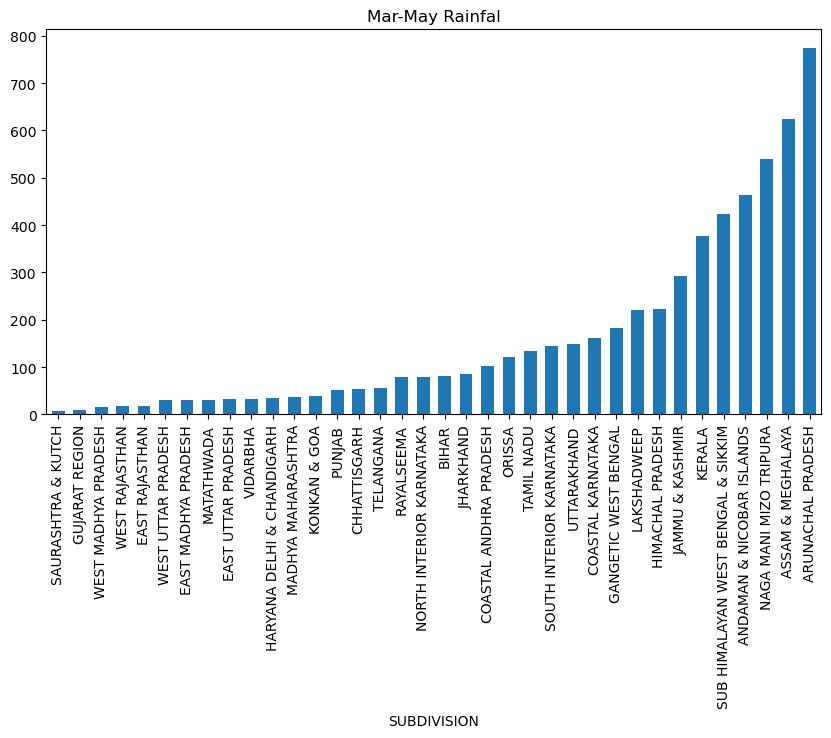

In [22]:
plt.figure(figsize=(10,5))
df_annual=df.groupby('SUBDIVISION').mean().sort_values(by='Mar-May')['Mar-May'].plot(kind='bar', width=0.6, title='Mar-May Rainfal')

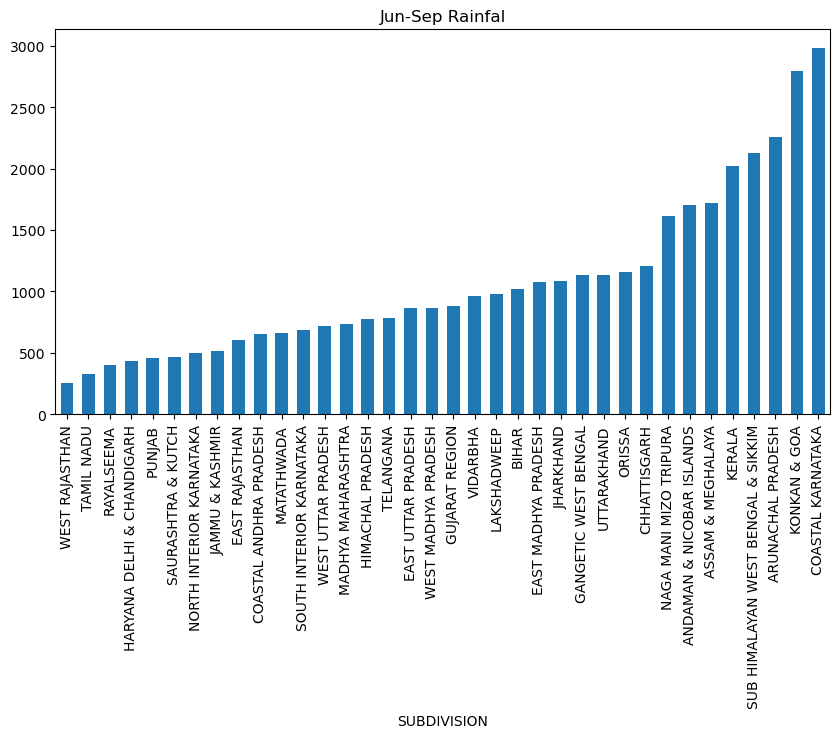

In [23]:
plt.figure(figsize=(10,5))
df_annual=df.groupby('SUBDIVISION').mean().sort_values(by='Jun-Sep')['Jun-Sep'].plot(kind='bar', width=0.6, title='Jun-Sep Rainfal')

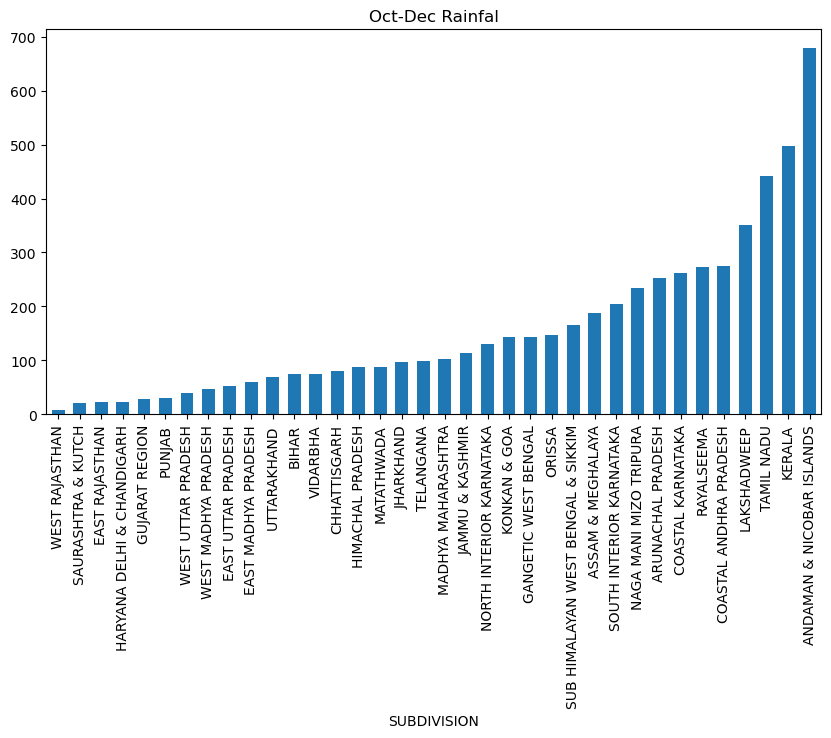

In [24]:
plt.figure(figsize=(10,5))
df_annual=df.groupby('SUBDIVISION').mean().sort_values(by='Oct-Dec')['Oct-Dec'].plot(kind='bar', width=0.6, title='Oct-Dec Rainfal')

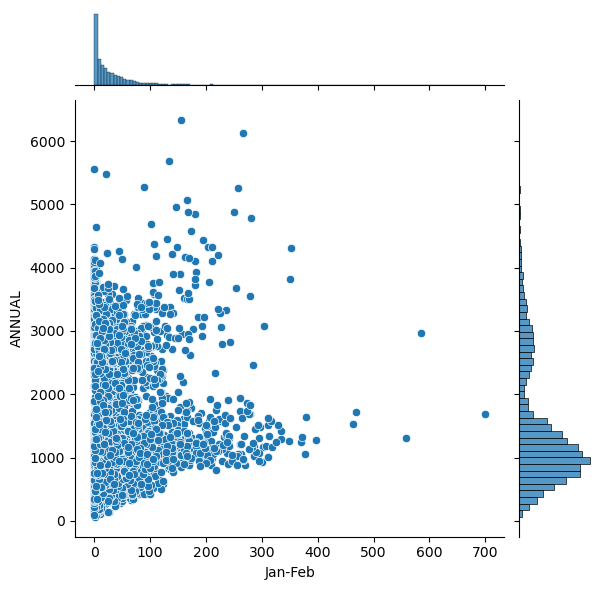

In [25]:
sns.jointplot(x='Jan-Feb', y='ANNUAL', data=df)
plt.show()

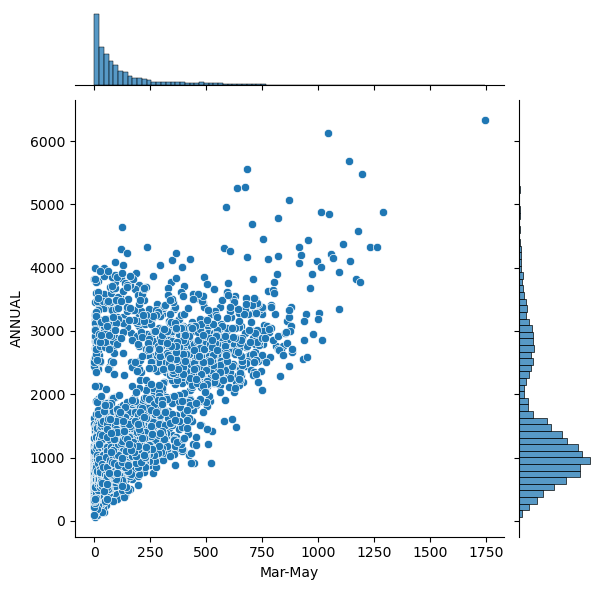

In [26]:
sns.jointplot(x='Mar-May', y='ANNUAL', data=df)
plt.show()

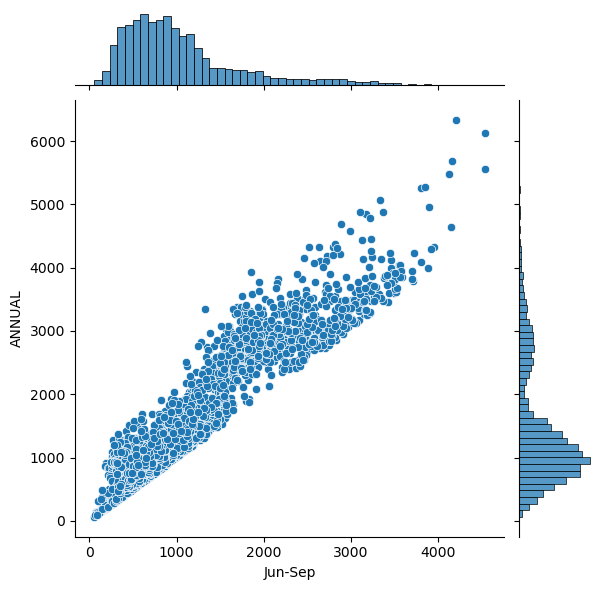

In [27]:
sns.jointplot(x='Jun-Sep', y='ANNUAL', data=df)
plt.show()

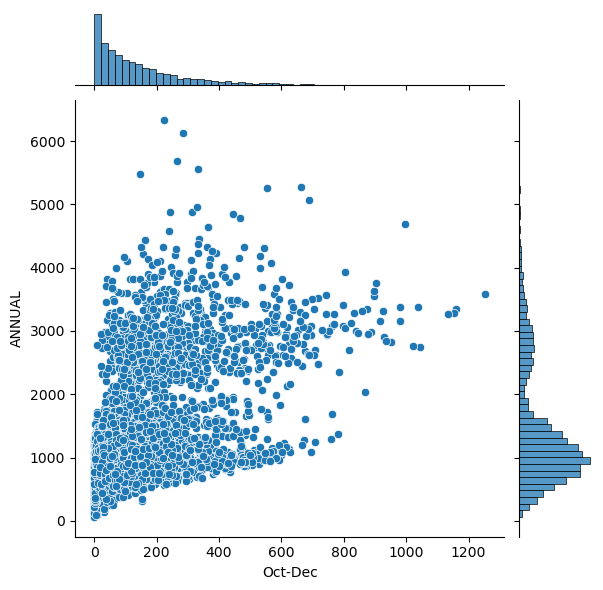

In [28]:
sns.jointplot(x='Oct-Dec', y='ANNUAL', data=df)
plt.show()

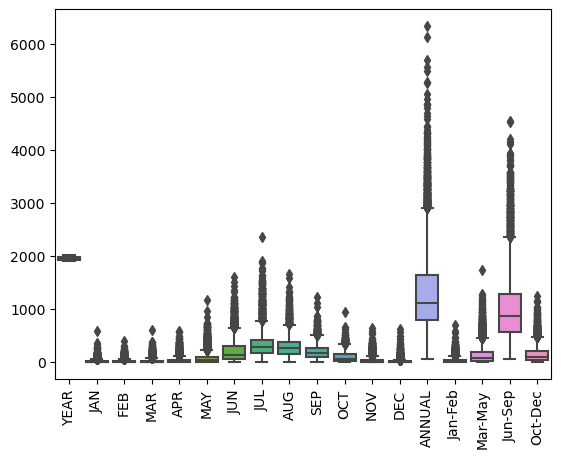

In [29]:
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [30]:
df.drop(['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC'],axis=1, inplace=True)

In [31]:
df

,SUBDIVISION,YEAR,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...
4085,LAKSHADWEEP,2011,1533.7,7.9,196.2,1013.0,316.6
4086,LAKSHADWEEP,2012,1405.5,19.3,99.6,1119.5,167.1
4087,LAKSHADWEEP,2013,1426.3,60.6,131.1,1057.0,177.6
4088,LAKSHADWEEP,2014,1395.0,69.3,76.7,958.5,290.5


In [32]:
def remove_outliers(column, data, max_p: float, min_p:float)-> None:
    maxima=data[column].quantile(max_p)
    minima=data[column].quantile(min_p)
    data[column][data[column]> maxima]=maxima
    data[column][data[column]< minima]=minima

In [33]:
remove_outliers(column='Jan-Feb',data=df,max_p=0.85,min_p=0.1)
remove_outliers(column='Mar-May',data=df,max_p=0.85,min_p=0.1)
remove_outliers(column='Jun-Sep',data=df,max_p=0.85,min_p=0.1)
remove_outliers(column='Oct-Dec',data=df,max_p=0.85,min_p=0.1)

C:\Users\HP\AppData\Local\Temp\ipykernel_10076\2513035104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column]> maxima]=maxima
C:\Users\HP\AppData\Local\Temp\ipykernel_10076\2513035104.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column][data[column]< minima]=minima


In [34]:
df.describe()

,YEAR,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000,4090.000000
mean,1958.321271,1411.008900,28.998631,122.010154,964.580626,128.273474
std,33.148944,903.846565,27.846286,117.964839,457.620911,104.679516
min,1901.000000,62.300000,0.400000,8.000000,374.170000,8.800000
25%,1930.000000,804.500000,4.100000,23.800000,573.275000,34.025000
50%,1959.000000,1121.300000,19.000000,74.250000,880.200000,97.550000
75%,1987.000000,1644.775000,50.200000,195.300000,1286.175000,211.800000
max,2015.000000,6331.100000,77.600000,340.395000,1729.195000,305.165000


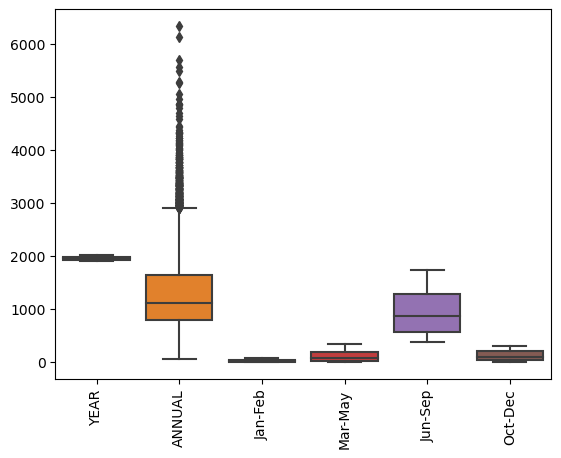

In [35]:
sns.boxplot(data=df)
plt.xticks(rotation=90);

In [36]:
scaler=MinMaxScaler()

In [37]:
df['Jan-Feb']=scaler.fit_transform(df['Jan-Feb'].values.reshape(-1,1))
df['Mar-May']=scaler.fit_transform(df['Mar-May'].values.reshape(-1,1))
df['Jun-Sep']=scaler.fit_transform(df['Jun-Sep'].values.reshape(-1,1))
df['Oct-Dec']=scaler.fit_transform(df['Oct-Dec'].values.reshape(-1,1))
df['ANNUAL']=scaler.fit_transform(df['ANNUAL'].values.reshape(-1,1))



In [38]:
encoder=LabelEncoder()

In [39]:
encoded_values=encoder.fit_transform(df['SUBDIVISION'])
df['SUBDIVISION']=encoded_values

decoded_values=encoder.inverse_transform(encoded_values)

In [40]:
mappings={}

for i in range(df.shape[0]):
    mappings[decoded_values[i]]=encoded_values[i]

In [41]:
mappings

{'ANDAMAN & NICOBAR ISLANDS': 0,
 'ARUNACHAL PRADESH': 1,
 'ASSAM & MEGHALAYA': 2,
 'NAGA MANI MIZO TRIPURA': 21,
 'SUB HIMALAYAN WEST BENGAL & SIKKIM': 28,
 'GANGETIC WEST BENGAL': 10,
 'ORISSA': 23,
 'JHARKHAND': 15,
 'BIHAR': 3,
 'EAST UTTAR PRADESH': 9,
 'WEST UTTAR PRADESH': 35,
 'UTTARAKHAND': 31,
 'HARYANA DELHI & CHANDIGARH': 12,
 'PUNJAB': 24,
 'HIMACHAL PRADESH': 13,
 'JAMMU & KASHMIR': 14,
 'WEST RAJASTHAN': 34,
 'EAST RAJASTHAN': 8,
 'WEST MADHYA PRADESH': 33,
 'EAST MADHYA PRADESH': 7,
 'GUJARAT REGION': 11,
 'SAURASHTRA & KUTCH': 26,
 'KONKAN & GOA': 17,
 'MADHYA MAHARASHTRA': 19,
 'MATATHWADA': 20,
 'VIDARBHA': 32,
 'CHHATTISGARH': 4,
 'COASTAL ANDHRA PRADESH': 5,
 'TELANGANA': 30,
 'RAYALSEEMA': 25,
 'TAMIL NADU': 29,
 'COASTAL KARNATAKA': 6,
 'NORTH INTERIOR KARNATAKA': 22,
 'SOUTH INTERIOR KARNATAKA': 27,
 'KERALA': 16,
 'LAKSHADWEEP': 18}

In [42]:
df

,SUBDIVISION,YEAR,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,1901,0.528155,1.000000,1.000000,0.975724,1.000000
1,0,1902,0.551685,1.000000,1.000000,1.000000,1.000000
2,0,1903,0.461827,1.000000,0.686232,1.000000,1.000000
3,0,1904,0.481320,0.306995,1.000000,1.000000,1.000000
4,0,1905,0.399502,0.011658,0.907655,0.923031,1.000000
...,...,...,...,...,...,...,...
4085,18,2011,0.234718,0.097150,0.566194,0.471453,1.000000
4086,18,2012,0.214267,0.244819,0.275576,0.550049,0.534139
4087,18,2013,0.217586,0.779793,0.370343,0.503924,0.569568
4088,18,2014,0.212593,0.892487,0.206682,0.431232,0.950517


In [43]:
def generate_probs(annual):
    p75,p50=df['ANNUAL'].quantile(0.75), df['ANNUAL'].quantile(0.5)
    if np.greater(annual,p75):
        return 'Strong'
    elif np.greater_equal(annual,p50) and np.less(annual,p75):
        return 'Medium'
    else:
        return 'Low'


In [44]:
df['Probability']=df.apply(lambda x: generate_probs(x['ANNUAL']), axis=1)

In [45]:
df

,SUBDIVISION,YEAR,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,Probability
0,0,1901,0.528155,1.000000,1.000000,0.975724,1.000000,Strong
1,0,1902,0.551685,1.000000,1.000000,1.000000,1.000000,Strong
2,0,1903,0.461827,1.000000,0.686232,1.000000,1.000000,Strong
3,0,1904,0.481320,0.306995,1.000000,1.000000,1.000000,Strong
4,0,1905,0.399502,0.011658,0.907655,0.923031,1.000000,Strong
...,...,...,...,...,...,...,...,...
4085,18,2011,0.234718,0.097150,0.566194,0.471453,1.000000,Medium
4086,18,2012,0.214267,0.244819,0.275576,0.550049,0.534139,Medium
4087,18,2013,0.217586,0.779793,0.370343,0.503924,0.569568,Medium
4088,18,2014,0.212593,0.892487,0.206682,0.431232,0.950517,Medium


In [46]:
df['Probability'].value_counts()

Low       2045
Strong    1023
Medium    1022
Name: Probability, dtype: int64

In [47]:
Le=LabelEncoder()

In [48]:
df['Probability']=Le.fit_transform(df['Probability'])

In [49]:
df['Probability'].value_counts()

0    2045
2    1023
1    1022
Name: Probability, dtype: int64

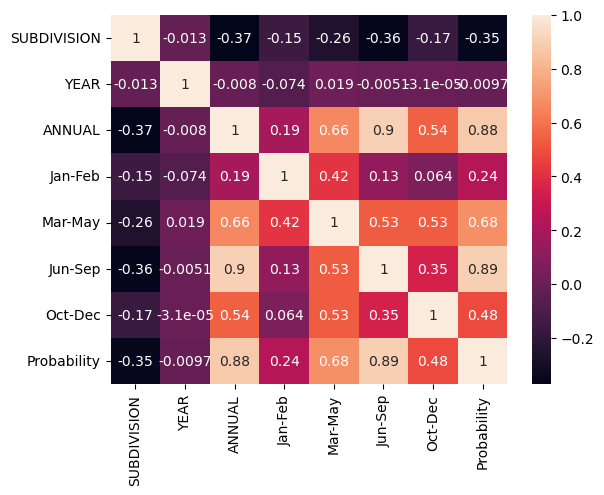

In [50]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

In [51]:
X=df.drop(['Probability','ANNUAL','YEAR'], axis=1)
Y= df['Probability']

In [52]:
X

,SUBDIVISION,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,0,1.000000,1.000000,0.975724,1.000000
1,0,1.000000,1.000000,1.000000,1.000000
2,0,1.000000,0.686232,1.000000,1.000000
3,0,0.306995,1.000000,1.000000,1.000000
4,0,0.011658,0.907655,0.923031,1.000000
...,...,...,...,...,...
4085,18,0.097150,0.566194,0.471453,1.000000
4086,18,0.244819,0.275576,0.550049,0.534139
4087,18,0.779793,0.370343,0.503924,0.569568
4088,18,0.892487,0.206682,0.431232,0.950517


In [53]:
model=SVC(kernel='linear', gamma='auto')

In [54]:
model.fit(X,Y)

SVC(gamma='auto', kernel='linear')

In [55]:
preds=model.predict(X)

In [56]:
from sklearn.metrics import r2_score

In [57]:
r2_score(Y, preds)

0.9512910526723899

In [58]:
df['PREDS']=preds

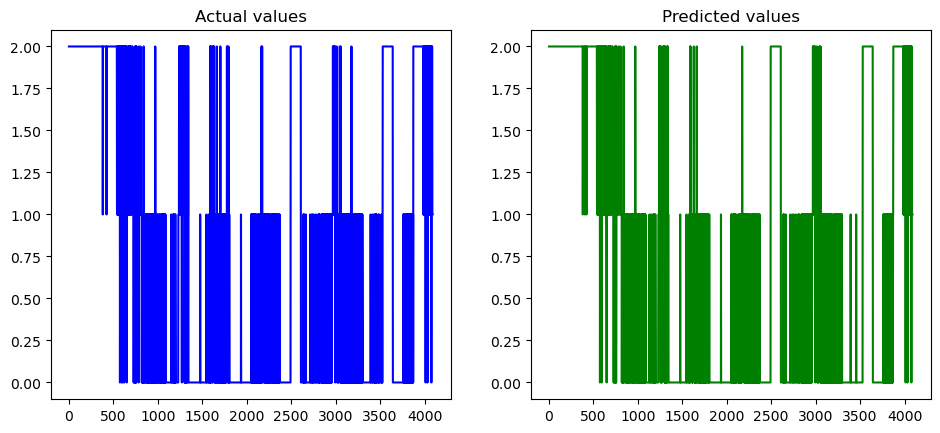

In [59]:
fig, axis=plt.subplots(1,2)
plt.subplots_adjust(right=1.5)

axis[0].plot(df['Probability'], 'blue')
axis[0].set(title='Actual values')

axis[1].plot(df['PREDS'], 'green')
axis[1].set(title='Predicted values')

plt.show()

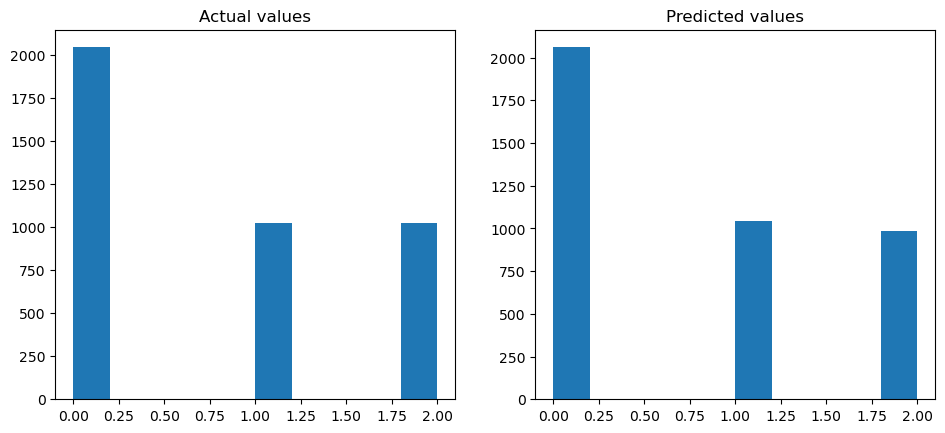

In [60]:
fig, axis=plt.subplots(1,2)
plt.subplots_adjust(right=1.5)

axis[0].hist(df['Probability'])
axis[0].set(title='Actual values')

axis[1].hist(df['PREDS'])
axis[1].set(title='Predicted values')

plt.show()

In [61]:
import pickle

In [62]:
pickle.dump(model, open(r'model.pkl','wb'))

In [63]:
#pip install streamlit